In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import statistics as st

In [2]:
df = pd.read_csv("fake_bills.csv", sep=';')

# Exploratory data analysis

Data types of data

In [3]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

Dimensions

In [4]:
df.shape

(1500, 7)

In [5]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Statistical Description of data

In [7]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Count of null values.

In [8]:
#df.isnull()
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
df.notna().sum()

is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1463
margin_up       1500
length          1500
dtype: int64

Bar plot of true and fake bills.

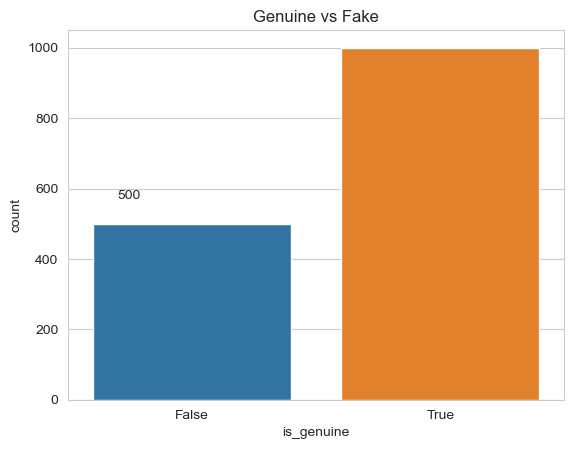

In [10]:
df.is_genuine.value_counts(normalize=True)
fig1 = sns.countplot(data=df, x='is_genuine')
plt.title("Genuine vs Fake")
for p in fig1.patches:
        fig1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+70))
plt.show()

Box plots

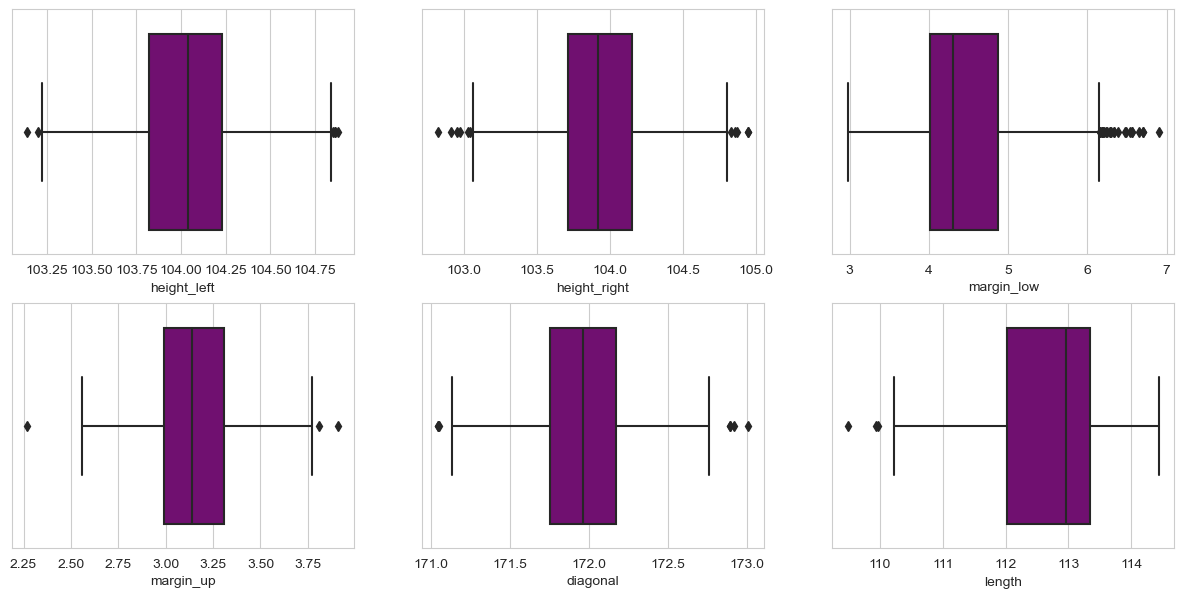

In [11]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.boxplot(data = df,x = "height_left",ax = axes[0,0],color = 'purple')
fig2 = sns.boxplot(data = df,x = "height_right",ax = axes[0,1],color = 'purple')
fig3 = sns.boxplot(data = df,x = "margin_low",ax = axes[0,2],color = 'purple')
fig4 = sns.boxplot(data = df,x = "margin_up",ax = axes[1,0],color = 'purple')
fig5 = sns.boxplot(data = df,x = "diagonal",ax = axes[1,1],color = 'purple')
fig6 = sns.boxplot(data = df,x = "length",ax = axes[1,2],color = 'purple')
plt.show()

Violin plots

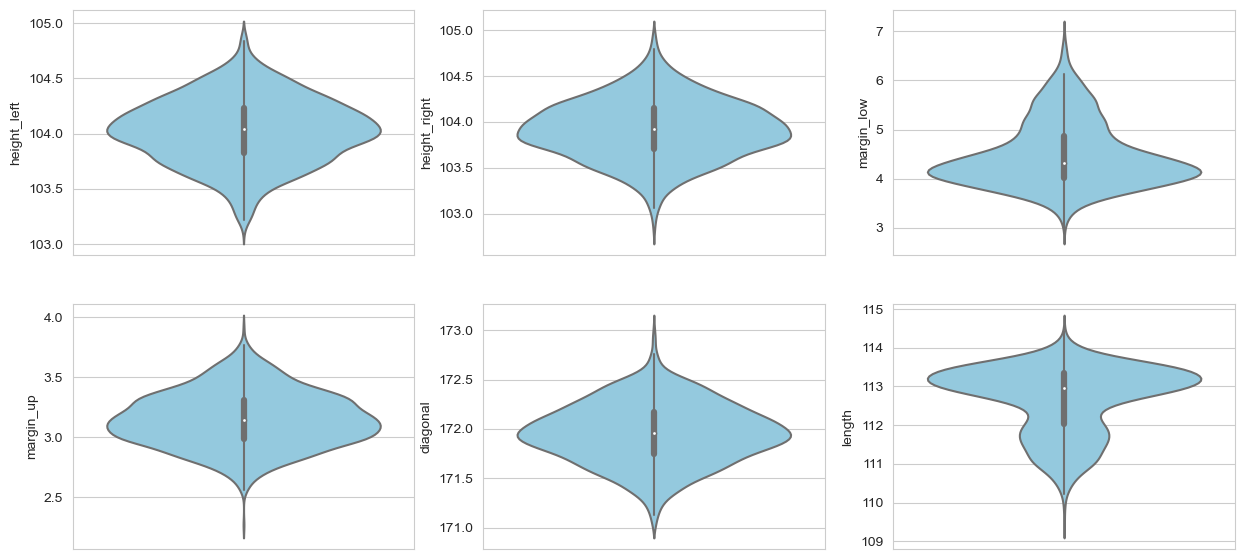

In [12]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.violinplot(data = df,y = "height_left",ax = axes[0,0],color = 'skyblue')
fig2 = sns.violinplot(data = df,y = "height_right",ax = axes[0,1],color = 'skyblue')
fig3 = sns.violinplot(data = df,y = "margin_low",ax = axes[0,2],color = 'skyblue')
fig4 = sns.violinplot(data = df,y = "margin_up",ax = axes[1,0],color = 'skyblue')
fig5 = sns.violinplot(data = df,y = "diagonal",ax = axes[1,1],color = 'skyblue')
fig6 = sns.violinplot(data = df,y = "length",ax = axes[1,2],color = 'skyblue')
plt.show()

Histograms

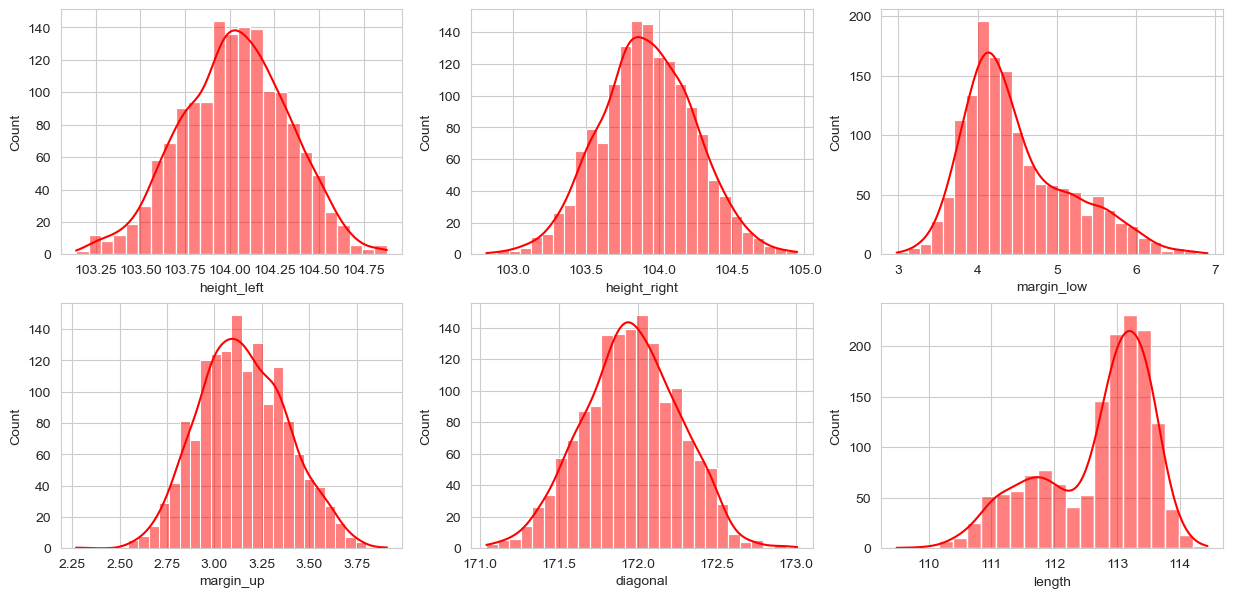

In [13]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",kde = True,ax = axes[0,0],color='red')
fig2 = sns.histplot(data = df,x = "height_right",kde = True,ax = axes[0,1],color='red')
fig3 = sns.histplot(data = df,x = "margin_low",kde = True,ax = axes[0,2],color='red')
fig4 = sns.histplot(data = df,x = "margin_up",kde = True,ax = axes[1,0],color='red')
fig5 = sns.histplot(data = df,x = "diagonal",kde = True,ax = axes[1,1],color='red')
fig6 = sns.histplot(data = df,x = "length",kde = True,ax = axes[1,2],color='red')
plt.show()

Histogram for true and fake bills for all Features.

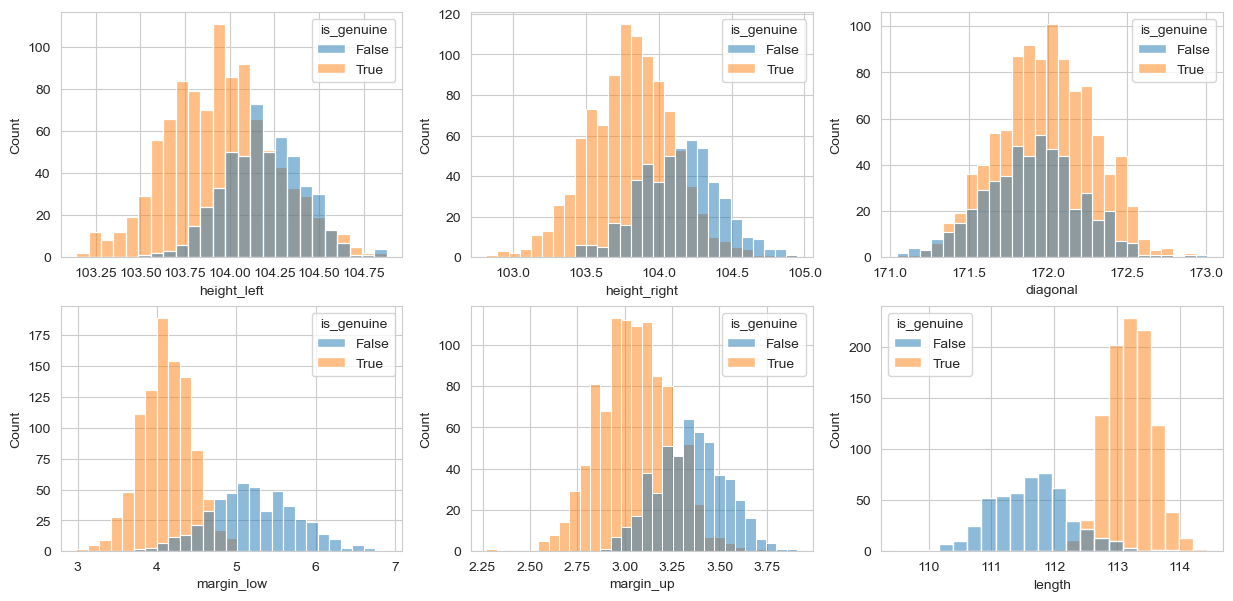

In [14]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",hue = 'is_genuine',ax = axes[0,0])
fig2 = sns.histplot(data = df,x = "height_right",hue = 'is_genuine',ax = axes[0,1])
fig3 = sns.histplot(data = df,x = "diagonal",hue = 'is_genuine',ax = axes[0,2])
fig4 = sns.histplot(data = df,x = "margin_low",hue = 'is_genuine',ax = axes[1,0])
fig5 = sns.histplot(data = df,x = "margin_up",hue = 'is_genuine',ax = axes[1,1])
fig6 = sns.histplot(data = df,x = "length",hue = 'is_genuine',ax = axes[1,2])
plt.show()

Scatter plots

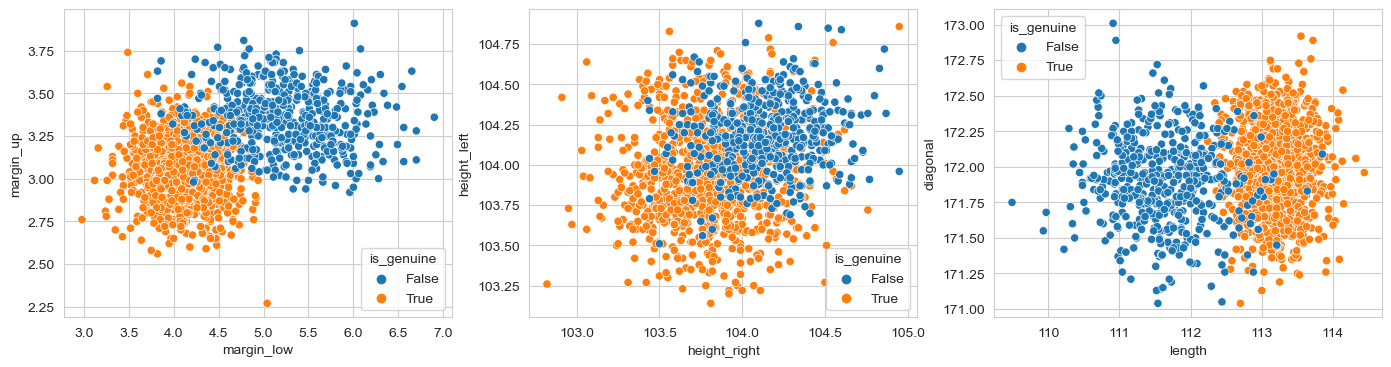

In [15]:
fig,axes = plt.subplots(1,3,figsize=(17,4))
fig1 = sns.scatterplot(data = df, x = "margin_low",y = "margin_up",hue = "is_genuine",ax=axes[0])
fig1 = sns.scatterplot(data = df, x = "height_right",y = "height_left",hue = "is_genuine",ax=axes[1])
fig1 = sns.scatterplot(data = df, x = "length",y = "diagonal",hue = "is_genuine",ax=axes[2])
plt.show()

Length X diagonal scatter plot To see separation of true and fake bills data.

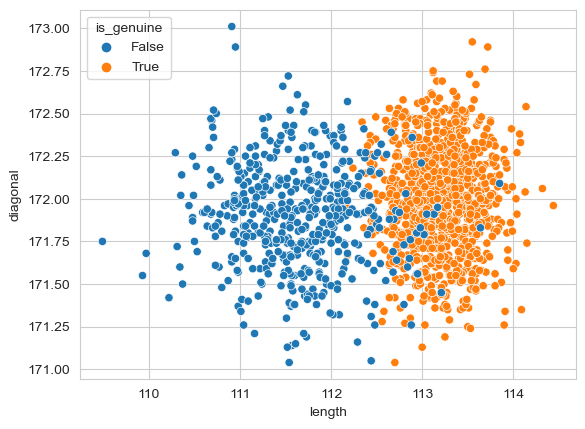

In [16]:
sns.scatterplot(data = df, x = "length",y = "diagonal",hue = "is_genuine")
plt.show()

Margin low X Margin up

<Axes: xlabel='margin_low', ylabel='margin_up'>

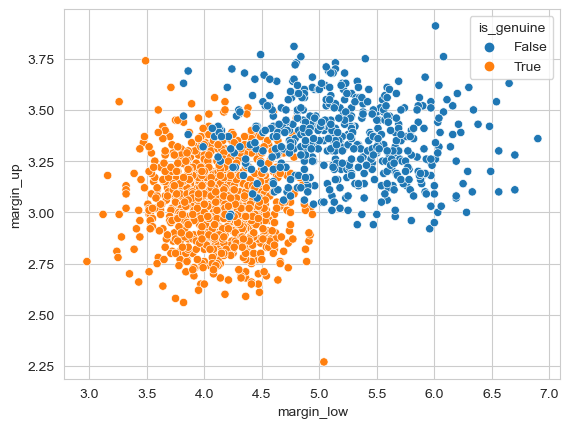

In [17]:
sns.scatterplot(data = df, x = "margin_low",y = "margin_up",hue = "is_genuine")

#### Correlation Between the Variables

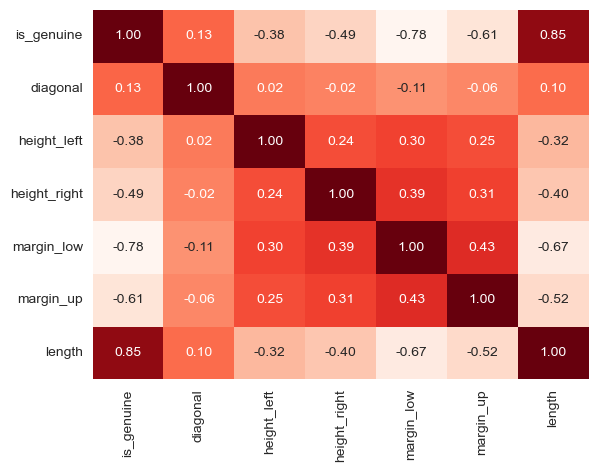

In [18]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds')
plt.show()

here we can see the 'is_genuine' & 'length' these two columns are highly correlated.

Bar plots

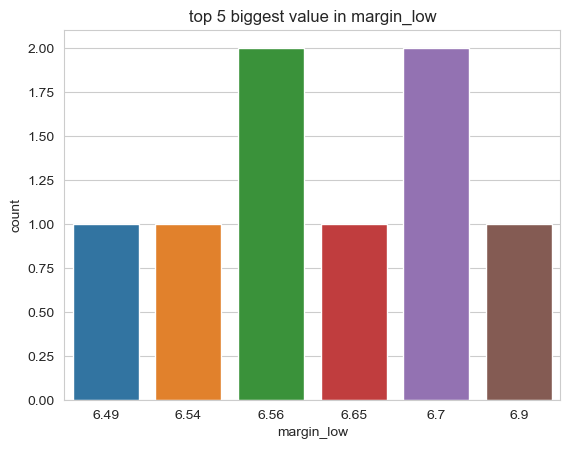

In [19]:
fig1 = sns.countplot(x = df['margin_low'].nlargest(n=8))
plt.title('top 5 biggest value in margin_low')
plt.show()

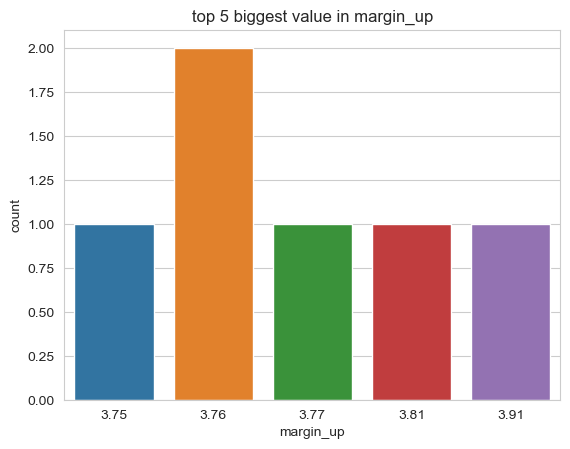

In [20]:
fig1 = sns.countplot(x = df['margin_up'].nlargest(n=6))
plt.title('top 5 biggest value in margin_up')
plt.show()

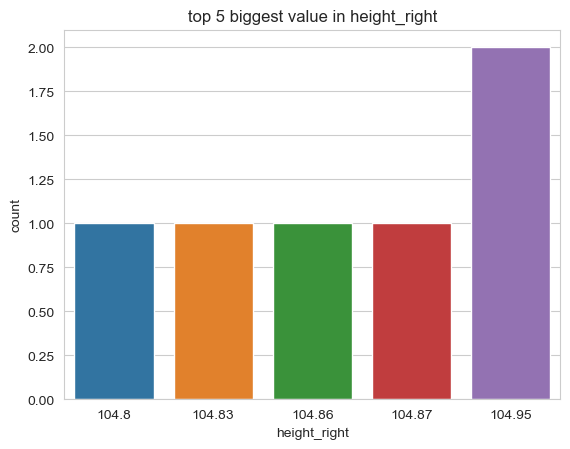

In [21]:
fig1 = sns.countplot(x = df['height_right'].nlargest(n=6))
plt.title('top 5 biggest value in height_right')
plt.show()

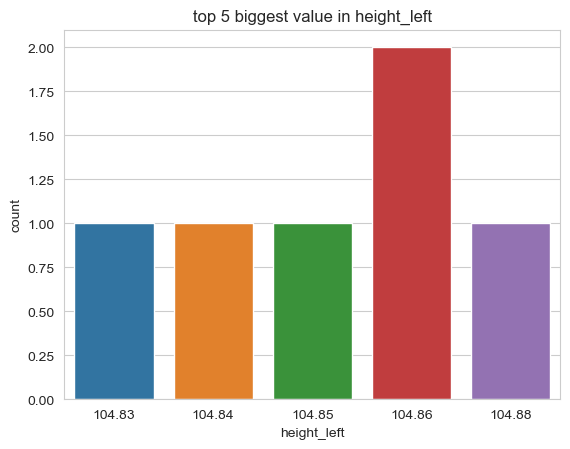

In [22]:
fig1 = sns.countplot(x = df['height_left'].nlargest(n=6))
plt.title('top 5 biggest value in height_left')
plt.show()

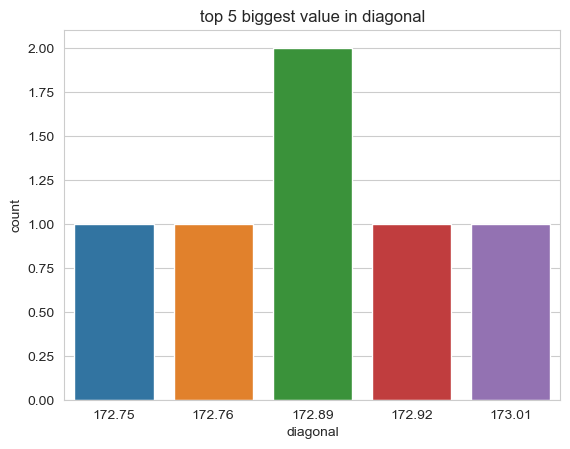

In [23]:
fig1 = sns.countplot(x = df['diagonal'].nlargest(n=6))
plt.title('top 5 biggest value in diagonal')
plt.show()

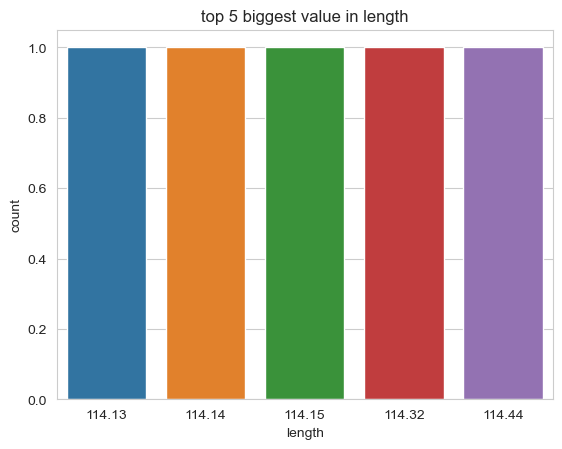

In [24]:
fig1 = sns.countplot(x = df['length'].nlargest(n=5))
plt.title('top 5 biggest value in length')
plt.show()

Filling null values with 'mean' , for better model bilding. 

------------------------------------------------test----------------------------------------------------

In [25]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [26]:
#here we have created 'df2' datafream to Preserve original data. 
#df2 = df.fillna(value = df['margin_low'].mean())
#df2.isna().sum()

Exporting new data frame as CSV.

In [27]:
#df2.to_csv("fakebills2.csv",index=False)

--------------------------------------------^^^-test-^^^---------------------------------------------

Replacing Missing Values

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

print(df_imputed)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0            1.0    171.81       104.86        104.95        4.52       2.89   
1            1.0    171.46       103.36        103.66        3.77       2.99   
2            1.0    172.69       104.48        103.50        4.40       2.94   
3            1.0    171.36       103.91        103.94        3.62       3.01   
4            1.0    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495         0.0    171.75       104.38        104.17        4.42       3.09   
1496         0.0    172.19       104.63        104.44        5.27       3.37   
1497         0.0    171.80       104.01        104.12        5.51       3.36   
1498         0.0    172.06       104.28        104.06        5.17       3.46   
1499         0.0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

In [30]:
#df_imputed.to_csv("df_imputed.csv",index=False)

In [31]:
df_imputed.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# finding null values & removing them

In [32]:
for x in ['diagonal','height_left','height_right','margin_low','margin_up','length']:
    q75,q25 = np.percentile(df_imputed.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_imputed.loc[df[x] < min,x] = np.nan
    df_imputed.loc[df[x] > max,x] = np.nan
    
    
    df_imputed = df_imputed.dropna(axis = 0)

In [33]:
#df_imputed.to_csv("df_clean.csv",index=False)

In [34]:
df2 = df_imputed

# Logistic Regression model with k-means clustering

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = df2

# Cluster the dataset using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)#value for k = 2 
dataset['cluster'] = kmeans.fit_predict(dataset[['length', 'margin_low']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[['length', 'margin_low', 'cluster']], dataset['is_genuine'], test_size=0.30, random_state=42)#data for training model 30%

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test the model
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)

print(f'Accuracy_logreg: {accuracy_logreg} ')

c:\Users\Shadow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shadow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Accuracy_logreg: 0.9862068965517241 


In [36]:
y_test

545     1.0
763     1.0
50      1.0
1424    0.0
142     1.0
       ... 
541     1.0
136     1.0
1208    0.0
1492    0.0
1161    0.0
Name: is_genuine, Length: 435, dtype: float64

In [37]:
y_pred

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1.

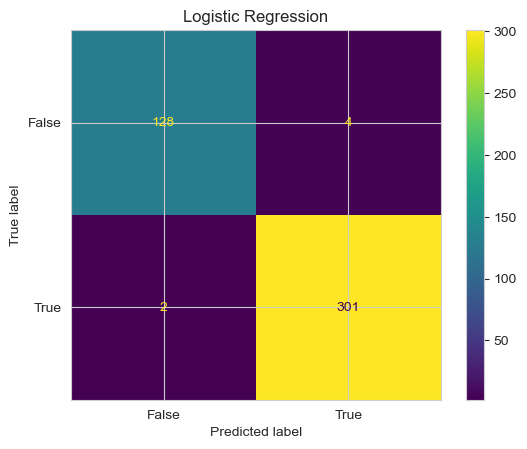

Accuracy_logreg: 0.9862068965517241


In [38]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Logistic Regression')
plt.show()
print(f'Accuracy_logreg: {accuracy_logreg}')